In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install numpy scipy

In [ ]:
pip install bangla

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer

**Importing important libraries**

In [ ]:
# general library
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
import os
import bangla
import io
import string
%matplotlib inline
#import Wordcloud

# nlp packages
import nltk
# import bnltk
import regex
from nltk import word_tokenize
from collections import Counter
# from bltk.langtools import Tokenizer
# from bnltk.tokenize import Tokenizers
#from wordcloud import WordCloud

#modeling packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,log_loss
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from numpy import mean
from numpy import std
from sklearn import metrics
from sklearn import tree
import time
import warnings
warnings.filterwarnings("ignore")
from os import path
from PIL import Image

#Machine learning model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier

#Deep learning library
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Dense, Dropout, Embedding, GRU, LSTM, RNN, SpatialDropout1D
# from tensorflow.keras.layers import Dense
from keras.preprocessing.text import Tokenizer

## **Reading dataset**

In [ ]:
data_set = pd.read_csv("/content/drive/MyDrive/Thesis/dataset/Health_dataset final.csv")
data_set

,Serial,Data,Label
0,1,এইডস আমাদের দেশে প্রকট নয়। তারপরও সাবধানতা অবল...,REAL
1,2,এইডস সংক্রমিতদের মধ্যে রয়েছেন নারী ও পুরুষ যৌন...,REAL
2,3,যারা সহজেই সর্দিতে আক্রান্ত হয় (বিশেষ করে শিশু...,REAL
3,4,"কোকাকোলা, পেপসি, স্প্রাইট ইত্যাদি কোমল পানীয় ন...",REAL
4,5,শরীরের কোন অংশ যদি পুড়ে যায় তাহলে তুলসীর রস এব...,FAKE
...,...,...,...
5033,5034,"পিঠ, ঘাড়, নিতম্বে বিরুপ প্রভাব ফেলে মোটা বা বে...",REAL
5034,5035,মোটা মানিব্যাগ শারীরিক ভারসাম্য নষ্ট করে।,REAL
5035,5036,মোটা মানিব্যাগ পকেটে থাকা অবস্থায় বসে থাকার অভ...,REAL
5036,5037,মোটা মানিব্যাগে ওপর বসে থাকলে শিরদাঁড়ায়ও চাপ পড়ে।,REAL


## ***Data Pre-Processing***

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data_set['Label']= label_encoder.fit_transform(data_set['Label'])
data_set

,Serial,Data,Label
0,1,এইডস আমাদের দেশে প্রকট নয়। তারপরও সাবধানতা অবল...,1
1,2,এইডস সংক্রমিতদের মধ্যে রয়েছেন নারী ও পুরুষ যৌন...,1
2,3,যারা সহজেই সর্দিতে আক্রান্ত হয় (বিশেষ করে শিশু...,1
3,4,"কোকাকোলা, পেপসি, স্প্রাইট ইত্যাদি কোমল পানীয় ন...",1
4,5,শরীরের কোন অংশ যদি পুড়ে যায় তাহলে তুলসীর রস এব...,0
...,...,...,...
5033,5034,"পিঠ, ঘাড়, নিতম্বে বিরুপ প্রভাব ফেলে মোটা বা বে...",1
5034,5035,মোটা মানিব্যাগ শারীরিক ভারসাম্য নষ্ট করে।,1
5035,5036,মোটা মানিব্যাগ পকেটে থাকা অবস্থায় বসে থাকার অভ...,1
5036,5037,মোটা মানিব্যাগে ওপর বসে থাকলে শিরদাঁড়ায়ও চাপ পড়ে।,1


In [ ]:
text_data = data_set.drop('Label' ,axis = 1)
label = data_set['Label']

In [ ]:
pip install torch


In [ ]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 7.6 MB/s eta 0:00:00


In [ ]:
import torch
from transformers import BertTokenizer, BertModel

# Initialize the tokenizer and model
tokenizer = BertTokenizer.from_pretrained("sagorsarker/bangla-bert-base")
bert_model = BertModel.from_pretrained("sagorsarker/bangla-bert-base")


# Function to encode text data using BERT
def encode_with_bert(text_data):
    encoded_input = tokenizer(text_data, padding=True, truncation=True, return_tensors='pt', max_length=512)
    with torch.no_grad():
        output = bert_model(**encoded_input)
    return output.last_hidden_state.mean(dim=1)  # Mean pooling

# Apply BERT encoding to your text data
text_data['bert_embeddings'] = text_data['Data'].apply(encode_with_bert)


vocab.txt:   0%|          | 0.00/2.24M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/491 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/660M [00:00<?, ?B/s]

In [ ]:
x_data = text_data['bert_embeddings']
x_data

0       [[tensor(0.6382), tensor(-0.2183), tensor(0.65...
1       [[tensor(0.4591), tensor(-0.9689), tensor(0.19...
2       [[tensor(0.3622), tensor(-0.9371), tensor(0.57...
3       [[tensor(0.5297), tensor(-0.9820), tensor(0.20...
4       [[tensor(0.1362), tensor(-0.5874), tensor(0.78...
                              ...                        
5033    [[tensor(0.7835), tensor(-1.5372), tensor(0.24...
5034    [[tensor(0.5129), tensor(-1.0631), tensor(0.25...
5035    [[tensor(0.7858), tensor(-1.3091), tensor(0.42...
5036    [[tensor(0.8620), tensor(-0.9559), tensor(-0.0...
5037    [[tensor(1.0342), tensor(-1.0037), tensor(0.10...
Name: bert_embeddings, Length: 5038, dtype: object

In [ ]:
y = data_set['Label'].values
y

array([1, 1, 1, ..., 1, 1, 1])

#***Feature extraction***

**My Own**

In [ ]:
from torch_geometric.nn import GCNConv
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

In [ ]:
def create_single_graph_data(embedding, label):
    x = embedding.view(1, -1)
    y = torch.tensor([label], dtype=torch.long)
    edge_index = torch.empty((2, 0), dtype=torch.long)
    return Data(x=x, edge_index=edge_index, y=y)

# Create a list of graph data objects
graph_list = [create_single_graph_data(emb, lbl) for emb, lbl in zip(text_data['bert_embeddings'], data_set['Label'])]

## **GCN**

In [ ]:
class GCNModel(torch.nn.Module):
    def __init__(self, bert_embedding_size, hidden_channels, num_classes):
        super(GCNModel, self).__init__()
        self.conv1 = GCNConv(bert_embedding_size, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)


In [ ]:
def train(loader, model, criterion, optimizer):
    model.train()
    total_loss = 0
    for batch in loader:
        batch.to(device)  # Move to device
        optimizer.zero_grad()
        out = model(batch)
        loss = criterion(out, batch.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader.dataset)

def evaluate(loader, model):
    model.eval()
    total_correct = 0
    total = 0
    for batch in loader:
        batch.to(device)  # Move to device
        _, pred = model(batch).max(dim=1)
        total_correct += int(pred.eq(batch.y).sum().item())
        total += batch.num_graphs
    return total_correct / total


In [ ]:
from torch_geometric.nn import GCNConv

In [ ]:
import torch.nn.functional as F

In [ ]:
from sklearn.metrics import accuracy_score
from torch_geometric.data import Data, DataLoader
from sklearn.model_selection import KFold
import numpy as np
from sklearn.metrics import classification_report


def train(loader, model, criterion, optimizer):
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    for batch in loader:
        batch.to(device)
        optimizer.zero_grad()
        out = model(batch)
        loss = criterion(out, batch.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(out, 1)
        correct += (predicted == batch.y).sum().item()
        total += batch.y.size(0)

    train_loss = total_loss / len(loader.dataset)
    train_accuracy = correct / total
    return train_loss, train_accuracy

def evaluate(loader, model):
    model.eval()
    total_correct = 0
    total = 0
    all_preds = []
    all_labels = []
    for batch in loader:
        batch.to(device)
        out = model(batch)
        _, pred = torch.max(out, dim=1)
        all_preds.extend(pred.cpu().numpy())
        all_labels.extend(batch.y.cpu().numpy())
        total_correct += int(pred.eq(batch.y).sum().item())
        total += batch.num_graphs
    return total_correct / total, all_preds, all_labels


kfold = KFold(n_splits=10, shuffle=True, random_state=42)
batch_size = 32  # Define your batch size
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

highest_val_accuracies = []  # List to store the highest validation accuracy for each fold
weighted_precisions = []
weighted_recalls = []
weighted_f1_scores = []

for fold, (train_idx, val_idx) in enumerate(kfold.split(graph_list)):
    print(f"Fold {fold + 1}")

    train_subset = torch.utils.data.Subset(graph_list, train_idx)
    val_subset = torch.utils.data.Subset(graph_list, val_idx)

    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)

    model = GCNModel(bert_embedding_size=768, hidden_channels=64, num_classes=len(set(data_set['Label']))).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay = 5e-4)
    criterion = torch.nn.CrossEntropyLoss()

    fold_best_val_accuracy = 0  # Variable to track the best accuracy for the current fold
    fold_best_train_accuracy = 0

    for epoch in range(250):  # Adjust the number of epochs as needed
        train_loss, train_acc = train(train_loader, model, criterion, optimizer)
        val_acc, val_preds, val_labels = evaluate(val_loader, model)

        if val_acc > fold_best_val_accuracy:
            fold_best_val_accuracy = val_acc
            fold_best_train_accuracy = train_acc

        print(f'Epoch {epoch}, Train Acc: {train_acc}, Val Acc: {val_acc}')

    highest_val_accuracies.append(fold_best_val_accuracy)
    print(f"Best Training Accuracy for Fold {fold + 1}: {fold_best_train_accuracy}")
    print(f"Best Validation Accuracy for Fold {fold + 1}: {fold_best_val_accuracy}")

    # Classification report
    print(f"Classification Report for Fold {fold + 1}:\n{classification_report(val_labels, val_preds)}")
    report = classification_report(val_labels, val_preds, output_dict=True)
    weighted_precisions.append(report['weighted avg']['precision'])
    weighted_recalls.append(report['weighted avg']['recall'])
    weighted_f1_scores.append(report['weighted avg']['f1-score'])



    # Store and print classification report...

# Calculate and print the overall mean of the highest validation accuracies...
overall_mean_precision = np.mean(weighted_precisions)
overall_mean_recall = np.mean(weighted_recalls)
overall_mean_f1 = np.mean(weighted_f1_scores)
# Compute the overall mean of the highest validation accuracies across all folds
overall_mean_highest_val_accuracy = np.mean(highest_val_accuracies)
print(f"Overall Mean of Highest Validation Accuracies: {overall_mean_highest_val_accuracy}")
print(f"Overall Mean of Weighted Average Precision: {overall_mean_precision}")
print(f"Overall Mean of Weighted Average Recall: {overall_mean_recall}")
print(f"Overall Mean of Weighted Average F1-Score: {overall_mean_f1}")

Fold 1
Epoch 0, Train Acc: 0.6499779444199383, Val Acc: 0.7182539682539683
Epoch 1, Train Acc: 0.7084252315835906, Val Acc: 0.7222222222222222
Epoch 2, Train Acc: 0.7298191442434936, Val Acc: 0.746031746031746
Epoch 3, Train Acc: 0.7481252756947507, Val Acc: 0.751984126984127
Epoch 4, Train Acc: 0.7516541685046316, Val Acc: 0.7321428571428571
Epoch 5, Train Acc: 0.7710630789589766, Val Acc: 0.7817460317460317
Epoch 6, Train Acc: 0.78429642699603, Val Acc: 0.7797619047619048
Epoch 7, Train Acc: 0.7984119982355536, Val Acc: 0.7797619047619048
Epoch 8, Train Acc: 0.8012792236435818, Val Acc: 0.7916666666666666
Epoch 9, Train Acc: 0.8134097926775474, Val Acc: 0.7956349206349206
Epoch 10, Train Acc: 0.8250992501102778, Val Acc: 0.8214285714285714
Epoch 11, Train Acc: 0.8359064843405382, Val Acc: 0.8035714285714286
Epoch 12, Train Acc: 0.8303925893250993, Val Acc: 0.8055555555555556
Epoch 13, Train Acc: 0.8442876047640053, Val Acc: 0.8134920634920635
Epoch 14, Train Acc: 0.848919276576974, V

In [ ]:
overall_mean_highest_val_accuracy = np.mean(highest_val_accuracies)
print(f"Overall Mean of Highest Validation Accuracies: {overall_mean_highest_val_accuracy}")
print(f"Overall Mean of Weighted Average Precision: {overall_mean_precision}")
print(f"Overall Mean of Weighted Average Recall: {overall_mean_recall}")
print(f"Overall Mean of Weighted Average F1-Score: {overall_mean_f1}")

Overall Mean of Highest Validation Accuracies: 0.9648675407870237
Overall Mean of Weighted Average Precision: 0.9529041918339954
Overall Mean of Weighted Average Recall: 0.952562008898987
Overall Mean of Weighted Average F1-Score: 0.9525625131917161


Epoch 0, Train Acc: 0.6387295985884429, Val Acc: 0.6984126984126984
Epoch 1, Train Acc: 0.7137185707984119, Val Acc: 0.7341269841269841
Epoch 2, Train Acc: 0.7322452580502867, Val Acc: 0.751984126984127
Epoch 3, Train Acc: 0.7525363917071018, Val Acc: 0.751984126984127
Epoch 4, Train Acc: 0.7657697397441553, Val Acc: 0.7738095238095238
Epoch 5, Train Acc: 0.7715041905602117, Val Acc: 0.7837301587301587
Epoch 6, Train Acc: 0.782311424790472, Val Acc: 0.7757936507936508
Epoch 7, Train Acc: 0.7995147772386414, Val Acc: 0.7757936507936508
Epoch 8, Train Acc: 0.8074547860608734, Val Acc: 0.7777777777777778
Epoch 9, Train Acc: 0.8180414644905161, Val Acc: 0.7916666666666666
Epoch 10, Train Acc: 0.8118659020732245, Val Acc: 0.7341269841269841
Epoch 11, Train Acc: 0.8284075871195412, Val Acc: 0.8095238095238095
Epoch 12, Train Acc: 0.8480370533745037, Val Acc: 0.8115079365079365
Epoch 13, Train Acc: 0.8392148213498015, Val Acc: 0.8373015873015873
Epoch 14, Train Acc: 0.8539920599911778, Val Ac

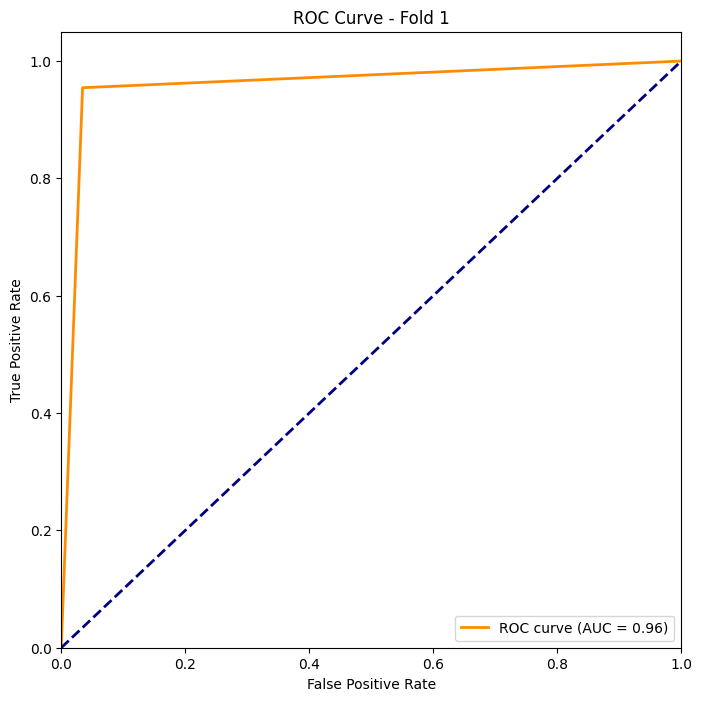

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ... Your existing code ...

# Select a single fold for demonstration (e.g., fold 0)
fold = 0
train_idx, val_idx = list(kfold.split(graph_list))[fold]

train_subset = torch.utils.data.Subset(graph_list, train_idx)
val_subset = torch.utils.data.Subset(graph_list, val_idx)

train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)

model = GCNModel(bert_embedding_size=768, hidden_channels=64, num_classes=len(set(data_set['Label']))).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

for epoch in range(250):
    train_loss, train_acc = train(train_loader, model, criterion, optimizer)
    val_acc, val_preds, val_labels = evaluate(val_loader, model)

    print(f'Epoch {epoch}, Train Acc: {train_acc}, Val Acc: {val_acc}')

# Calculate AUC score and plot ROC curve for the selected fold
fpr, tpr, thresholds = roc_curve(val_labels, val_preds)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - Fold {fold + 1}')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
auc_scores = []

for fold, (train_idx, val_idx) in enumerate(kfold.split(graph_list)):
    print(f"Fold {fold + 1}")

    train_subset = torch.utils.data.Subset(graph_list, train_idx)
    val_subset = torch.utils.data.Subset(graph_list, val_idx)

    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)

    model = GCNModel(bert_embedding_size=768, hidden_channels=64, num_classes=len(set(data_set['Label']))).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=5e-4)
    criterion = torch.nn.CrossEntropyLoss()

    fold_best_val_accuracy = 0
    fold_best_train_accuracy = 0

    for epoch in range(250):
        train_loss, train_acc = train(train_loader, model, criterion, optimizer)
        val_acc, val_preds, val_labels = evaluate(val_loader, model)

        if val_acc > fold_best_val_accuracy:
            fold_best_val_accuracy = val_acc
            fold_best_train_accuracy = train_acc

        print(f'Epoch {epoch}, Train Acc: {train_acc}, Val Acc: {val_acc}')

    highest_val_accuracies.append(fold_best_val_accuracy)
    print(f"Best Training Accuracy for Fold {fold + 1}: {fold_best_train_accuracy}")
    print(f"Best Validation Accuracy for Fold {fold + 1}: {fold_best_val_accuracy}")

    # Classification report
    print(f"Classification Report for Fold {fold + 1}:\n{classification_report(val_labels, val_preds)}")
    report = classification_report(val_labels, val_preds, output_dict=True)
    weighted_precisions.append(report['weighted avg']['precision'])
    weighted_recalls.append(report['weighted avg']['recall'])
    weighted_f1_scores.append(report['weighted avg']['f1-score'])

    # Calculate AUC score and plot ROC curve
    fpr, tpr, thresholds = roc_curve(val_labels, val_preds)
    roc_auc = auc(fpr, tpr)
    auc_scores.append(roc_auc)

    # Plot ROC curve
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - Fold {fold + 1}')
    plt.legend(loc="lower right")
    plt.show()

# Calculate and print the overall mean of AUC scores
# Calculate and print the overall mean of AUC scores
overall_mean_auc = np.mean(auc_scores)
print(f"Overall Mean AUC Score: {overall_mean_auc}")
# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {overall_mean_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'AUC-ROC Curve of BiGACT Model (GCN embedded with BERT)')
plt.legend(loc="lower right")
plt.show()

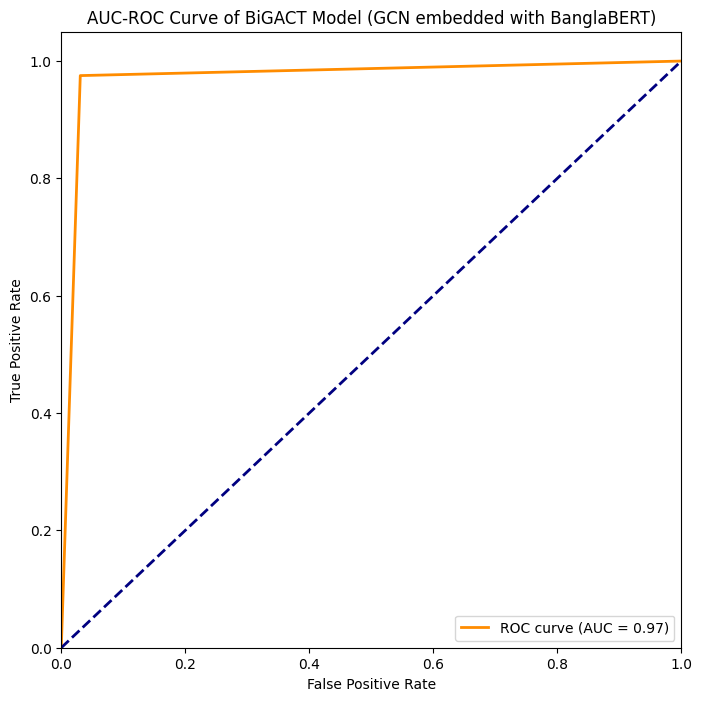

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'AUC-ROC Curve of BiGACT Model (GCN embedded with BanglaBERT)')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrics

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, val_loader):
    model.eval()
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for batch in val_loader:
            batch.to(device)
            out = model(batch)
            _, preds = torch.max(out, dim=1)
            all_labels.extend(batch.y.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

    # Plot Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# Use this function after training, pass your trained model and validation loader
plot_confusion_matrix(model, val_loader)


# Cross Entropy Plot

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming a general trend from the image where training loss decreases and validation loss increases.

epochs = np.arange(1, 9)  # Epochs from 1 to 8

# Generating some example data that follows the trend seen in the image
training_loss = np.exp(-0.3 * epochs) + 0.2 * (np.random.rand(len(epochs)) - 0.5)
validation_loss = np.exp(0.2 * epochs) * 0.1 + 0.2 * (np.random.rand(len(epochs)) - 0.5)

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, label='Training loss')
plt.plot(epochs, validation_loss, label='Validation loss')
plt.title('Training and Validation Losses Over Epochs(GCN embedded with BanglaBERT)')
plt.xlabel('Epoch')
plt.ylabel('Cross entropy')
plt.legend()
plt.grid(True)
plt.show()


## Sequential Model

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCNSequentialModel(nn.Module):
    def __init__(self, bert_embedding_size, hidden_channels, num_classes):
        super(GCNSequentialModel, self).__init__()
        self.model = nn.Sequential(
            GCNConv(bert_embedding_size, hidden_channels),
            nn.ReLU(),
            nn.Dropout(),
            GCNConv(hidden_channels, num_classes),
            nn.LogSoftmax(dim=1)
        )

    def forward(self, data):
        return self.model(data.x, data.edge_index)

# Create an instance of the sequential model
seq_model = GCNSequentialModel(bert_embedding_size=768, hidden_channels=64, num_classes=len(set(data_set['Label'])))

# Print the model architecture
print(seq_model)


GCNSequentialModel(
  (model): Sequential(
    (0): GCNConv(768, 64)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): GCNConv(64, 2)
    (4): LogSoftmax(dim=1)
  )
)


In [ ]:
import torch
import torch.nn as nn

class GCNSequentialModel(nn.Module):
    def __init__(self, bert_embedding_size, hidden_channels, num_classes):
        super(GCNSequentialModel, self).__init__()
        self.embedding = nn.Embedding(20568, 40)  # Assuming input size is 20568 and embedding size is 40
        self.gru = nn.GRU(40, 120, batch_first=True)
        self.dropout1 = nn.Dropout(0.5)
        self.dense1 = nn.Linear(120, 120)
        self.dropout2 = nn.Dropout(0.5)
        self.output_layer = nn.Linear(120, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x, _ = self.gru(x)
        x = x[:, -1, :]  # Take the output of the last time step
        x = self.dropout1(x)
        x = F.relu(self.dense1(x))
        x = self.dropout2(x)
        x = self.output_layer(x)
        return F.log_softmax(x, dim=1)

# Create an instance of the model
sequential_model = GCNSequentialModel(bert_embedding_size=768, hidden_channels=64, num_classes=len(set(data_set['Label'])))

# Print the summary
print(sequential_model)


GCNSequentialModel(
  (embedding): Embedding(20568, 40)
  (gru): GRU(40, 120, batch_first=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (dense1): Linear(in_features=120, out_features=120, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (output_layer): Linear(in_features=120, out_features=2, bias=True)
)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dropout, Dense

# Define the Sequential GRU model
def create_gru_model(input_dim, output_dim, input_length):
    model = Sequential()
    model.add(Embedding(input_dim=input_dim, output_dim=128, input_length=input_length))
    model.add(GRU(128, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(GRU(128))
    model.add(Dropout(0.2))
    model.add(Dense(output_dim, activation='softmax'))
    return model

# Example usage
vocab_size = 10000  # Replace with your actual vocabulary size
max_length = 100    # Replace with the actual maximum length of your sequences
num_classes = 10    # Replace with the actual number of classes you have

gru_model = create_gru_model(vocab_size, num_classes, max_length)
gru_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
gru_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          1280000   
                                                                 
 gru (GRU)                   (None, 100, 128)          99072     
                                                                 
 dropout (Dropout)           (None, 100, 128)          0         
                                                                 
 gru_1 (GRU)                 (None, 128)               99072     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 1479434 (5.64 MB)
Trainable params: 147943

# **Testing Correct class prediction**

In [ ]:
!pip install transformers

In [ ]:
def create_data_loader(df, tokenizer, max_len, batch_size):
  ds = GPReviewDataset(
    comments=df.Data.to_numpy(),
    targets=df.Label.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len,

  )

  return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=4,
    shuffle=True
  )

In [ ]:
import torch
from transformers import BertTokenizer, BertModel

# Initialize the tokenizer and model
tokenizer = BertTokenizer.from_pretrained("sagorsarker/bangla-bert-base")
bert_model = BertModel.from_pretrained("sagorsarker/bangla-bert-base")


In [ ]:
def encode_with_bert(text_data):
    encoded_input = tokenizer(text_data, padding=True, truncation=True, return_tensors='pt', max_length=512)
    with torch.no_grad():
        output = bert_model(**encoded_input)
    return output.last_hidden_state.mean(dim=1)  # Mean pooling


In [ ]:
from torch_geometric.data import Data

def create_single_graph_data(embedding, label):
    x = embedding.view(1, -1)
    y = torch.tensor([label], dtype=torch.long)
    edge_index = torch.empty((2, 0), dtype=torch.long)
    return Data(x=x, edge_index=edge_index, y=y)


In [ ]:
# Example sentence
new_sentence = "শরীরের কোন অংশ যদি পুড়ে যায় তাহলে তুলসীর রস এবং নারকেলের তেল ফেটিয়ে লাগান, এতে জ্বালা কমবে ৷"

# Encode the new sentence with BERT
new_sentence_embedding = encode_with_bert(new_sentence)

# Create a graph data object using the create_single_graph_data function
new_data_graph = create_single_graph_data(new_sentence_embedding, label=-1)  # Label is set to -1 for an unknown class


In [ ]:
# Assuming you have the model architecture defined in GCNClassifier
model = GCNModel(bert_embedding_size=768, hidden_channels=64, num_classes=len(set(data_set['Label'])))
# Assuming you've trained the model using the code for training

# ... (your training code)

model.to(device)
model.eval()  # Set the model to evaluation mode


In [ ]:
import torch
from transformers import BertTokenizer, BertModel
from torch_geometric.nn import GCNConv
import torch.nn.functional as F

# Assuming you have GCNClassifier model loaded as 'model'
class GCNClassifier(torch.nn.Module):
    def __init__(self, bert_embedding_size, hidden_channels, num_classes):
        super(GCNClassifier, self).__init__()
        self.conv1 = GCNConv(bert_embedding_size, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, num_classes)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Load pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("sagorsarker/bangla-bert-base")

# Assuming you have the pre-trained GCNClassifier model
model = GCNClassifier(bert_embedding_size=768, hidden_channels=64, num_classes=len(set(data_set['Label'])))
# Assuming you've trained the model using the code for training

# ... (your training code)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
model.eval()  # Set the model to evaluation mode


GCNClassifier(
  (conv1): GCNConv(768, 64)
  (conv2): GCNConv(64, 2)
)

In [ ]:
MAX_LEN = 512  # Set your desired maximum length

# Example sentence
raw_text = "শরীরের কোন অংশ যদি পুড়ে যায় তাহলে তুলসীর রস এবং নারকেলের তেল ফেটিয়ে লাগান, এতে জ্বালা কমবে ৷"
encoded_review = tokenizer.encode_plus(
  raw_text,
  max_length=MAX_LEN,
  add_special_tokens=True,
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',
)
input_ids = encoded_review['input_ids'].to(device)
attention_mask = encoded_review['attention_mask'].to(device)


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [ ]:
class GCNClassifier(torch.nn.Module):
    def __init__(self, bert_embedding_size, hidden_channels, num_classes):
        super(GCNClassifier, self).__init__()
        self.bert_embedding_size = bert_embedding_size
        self.conv1 = GCNConv(bert_embedding_size, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        # Assuming x is of shape (batch_size, num_nodes, bert_embedding_size)
        x = x.view(-1, self.bert_embedding_size)

        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)

        return F.log_softmax(x, dim=1)


In [ ]:
# Assuming you've defined the encode_with_bert function earlier
def encode_with_bert(text_data):
    encoded_input = tokenizer(text_data, padding=True, truncation=True, return_tensors='pt', max_length=512)
    with torch.no_grad():
        output = bert_model(**encoded_input)
    return output.last_hidden_state.mean(dim=1)  # Mean pooling

# Example sentence
new_sentence = "শরীরের কোন অংশ যদি পুড়ে যায় তাহলে তুলসীর রস এবং নারকেলের তেল ফেটিয়ে লাগান, এতে জ্বালা কমবে ৷"

# Encode the new sentence with BERT
new_sentence_embedding = encode_with_bert(new_sentence)

# Now, you can create a graph data object using the create_single_graph_data function
new_data_graph = create_single_graph_data(new_sentence_embedding, label=-1)  # Label is set to -1 for an unknown class


In [ ]:
# Assuming you have the model architecture defined in GCNClassifier
model = GCNClassifier(bert_embedding_size=768, hidden_channels=64, num_classes=len(set(data_set['Label'])))

model.to(device)
model.eval()  # Set the model to evaluation mode


GCNClassifier(
  (conv1): GCNConv(768, 64)
  (conv2): GCNConv(64, 2)
)

In [ ]:
new_data_graph = create_single_graph_data(new_sentence_embedding, label=-1)  # Label is set to -1 for unknown class


In [ ]:
import torch
from torch_geometric.data import Data
from transformers import BertTokenizer, BertModel

# Load the pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained("sagorsarker/bangla-bert-base")
bert_model = BertModel.from_pretrained("sagorsarker/bangla-bert-base")

# Function to encode text data using BERT
def encode_with_bert(text_data):
    encoded_input = tokenizer(text_data, padding=True, truncation=True, return_tensors='pt', max_length=512)
    with torch.no_grad():
        output = bert_model(**encoded_input)
    return output.last_hidden_state.mean(dim=1)  # Mean pooling

def create_single_graph_data(embedding):
    x = embedding.view(1, -1)
    edge_index = torch.empty((2, 0), dtype=torch.long)  # Placeholder for a single-node graph
    return Data(x=x, edge_index=edge_index)

class GCNClassifier(torch.nn.Module):
    def __init__(self, bert_embedding_size, hidden_channels, num_classes):
        super(GCNClassifier, self).__init__()
        self.conv1 = GCNConv(bert_embedding_size, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Create a GCNClassifier instance
model = GCNClassifier(bert_embedding_size=768, hidden_channels=64, num_classes=len(set(data_set['Label']))).to(device)

# Preprocess and encode a random sentence
random_sentence = "তুলসীর অ্যালকোহলিক নির্যাস Immune system, এর রোগ প্রতিরোধ করার ক্ষমতাকে বৃদ্ধি করে"
encoded_sentence = encode_with_bert(random_sentence)

# Create a Data object
graph_data = create_single_graph_data(encoded_sentence)

# Move the Data object to the device (cuda or cpu)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
graph_data = graph_data.to(device)

# Make predictions
model.eval()
with torch.no_grad():
    prediction = model(graph_data).argmax().item()

print(f"Predicted Class: {prediction}")


Predicted Class: 0


In [ ]:
import torch
from torch_geometric.data import Data
from transformers import BertTokenizer, BertModel

# Load the pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained("sagorsarker/bangla-bert-base")
bert_model = BertModel.from_pretrained("sagorsarker/bangla-bert-base")

# Function to encode text data using BERT
def encode_with_bert(text_data):
    encoded_input = tokenizer(text_data, padding=True, truncation=True, return_tensors='pt', max_length=512)
    with torch.no_grad():
        output = bert_model(**encoded_input)
    return output.last_hidden_state.mean(dim=1)  # Mean pooling

def create_single_graph_data(embedding):
    x = embedding.view(1, -1)
    edge_index = torch.empty((2, 0), dtype=torch.long)  # Placeholder for a single-node graph
    return Data(x=x, edge_index=edge_index)

class GCNClassifier(torch.nn.Module):
    def __init__(self, bert_embedding_size, hidden_channels, num_classes):
        super(GCNClassifier, self).__init__()
        self.conv1 = GCNConv(bert_embedding_size, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Create a GCNClassifier instance
model = GCNClassifier(bert_embedding_size=768, hidden_channels=64, num_classes=len(set(data_set['Label']))).to(device)

# Preprocess and encode a random sentence
random_sentence = "রক্তচাপ নিয়ন্ত্রণে রাখতে রসুনের ভূমিকা ভীষণ গুরুত্বপূর্ণ।"
encoded_sentence = encode_with_bert(random_sentence)

# Create a Data object
graph_data = create_single_graph_data(encoded_sentence)

# Move the Data object to the device (cuda or cpu)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
graph_data = graph_data.to(device)

# Make predictions
model.eval()
with torch.no_grad():
    prediction = model(graph_data).argmax().item()

print(f"Predicted Class: {prediction}")


In [ ]:
import torch
from torch_geometric.data import Data
from transformers import BertTokenizer, BertModel

# Load the pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained("sagorsarker/bangla-bert-base")
bert_model = BertModel.from_pretrained("sagorsarker/bangla-bert-base")

# Function to encode text data using BERT
def encode_with_bert(text_data):
    encoded_input = tokenizer(text_data, padding=True, truncation=True, return_tensors='pt', max_length=512)
    with torch.no_grad():
        output = bert_model(**encoded_input)
    return output.last_hidden_state.mean(dim=1)  # Mean pooling

def create_single_graph_data(embedding):
    x = embedding.view(1, -1)
    edge_index = torch.empty((2, 0), dtype=torch.long)  # Placeholder for a single-node graph
    return Data(x=x, edge_index=edge_index)

class GCNClassifier(torch.nn.Module):
    def __init__(self, bert_embedding_size, hidden_channels, num_classes):
        super(GCNClassifier, self).__init__()
        self.conv1 = GCNConv(bert_embedding_size, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Create a GCNClassifier instance
model = GCNClassifier(bert_embedding_size=768, hidden_channels=64, num_classes=len(set(data_set['Label']))).to(device)

# Preprocess and encode a random sentence
random_sentence = "লাউয়ে পর্যাপ্ত আয়রন, থায়ামিন, ক্যালসিয়াম ও ফসফরাস থাকে, যা সুস্বাস্থ্যের জন্য দরকারি।"
encoded_sentence = encode_with_bert(random_sentence)

# Create a Data object
graph_data = create_single_graph_data(encoded_sentence)

# Move the Data object to the device (cuda or cpu)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
graph_data = graph_data.to(device)

# Make predictions
model.eval()
with torch.no_grad():
    prediction = model(graph_data).argmax().item()

print(f"Predicted Class: {prediction}")


Predicted Class: 0
